In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import sys, os, glob, shutil

user = os.path.expanduser('~')
sys.path.insert(0, '..')
sys.path.insert(0, f'{user}/Dropbox/Projects/')
sys.path.insert(0, f'{user}/Dropbox/Projects/social_navigation_analysis/social_navigation_analysis')
sys.path.insert(0, f'{user}/Dropbox/Projects/toolbox/toolbox')

from circ_stats import calculate_angle, angle_between_vectors
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt


In [154]:
# def polar_coordinates(u, v=None):   
#     '''
#         return r, theta pairwise between vectors 
#         outputs in radians
#     '''
#     u = np.array(u)
#     if v is None: v = np.array([[0,0]])
#     else: v = np.array(v)

#     r     = pairwise_distances(u, None, metric='euclidean')[0][0]
#     theta = angle_between_vectors(u, v, direction=False)
#     return np.array([r, theta]).astype(float)


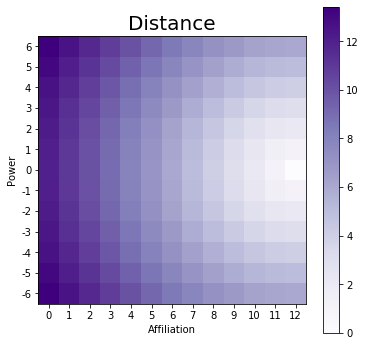

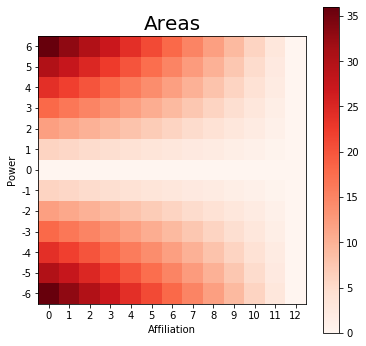

In [21]:
# at each possible point in the space, calculate the ratio, angle and distance...
dist, degs, cos, sin, areas = np.zeros((13, 13)), np.zeros((13, 13)), np.zeros((13, 13)), np.zeros((13, 13)), np.zeros((13, 13))

for ai,a in enumerate(range(-6,7)):
    for pi,p in enumerate(reversed(range(-6,7))):
        
        origin  = np.array([6,0])
        adj_vec = np.array([a,p]) - origin
        ref_vec = np.array([6,6]) - origin
        
        r   = pairwise_distances(adj_vec[np.newaxis], np.array([0,0])[np.newaxis], metric='euclidean')[0][0]
        rad = angle_between_vectors(adj_vec, ref_vec, direction=None) # CCW angle, between 0-180

        dist[pi,ai]  = r
        degs[pi,ai]  = np.rad2deg(rad)
        cos[pi,ai]   = np.cos(rad)
        sin[pi,ai]   = np.sin(rad)
        areas[pi,ai] = np.abs((adj_vec[0] * adj_vec[1])/2)

#--------------------------------------------
# plot 1
#--------------------------------------------

fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(dist, cmap='Purples', zorder=0)
plt.title('Distance', fontsize=20)
ax.set_xlabel('Affiliation', fontsize=10)
ax.set_ylabel('Power', fontsize=10)
ax.set_yticks(np.arange(0, 13, 1))
ax.set_yticklabels(reversed(np.arange(-6,7)))
ax.set_xticks(np.arange(0, 13, 1))
ax.set_xticklabels(np.arange(0,13))
plt.colorbar()
plt.show()

# #--------------------------------------------
# # plot 3
# #--------------------------------------------

# fig, ax = plt.subplots(figsize=(6,6))
# plt.imshow(cos, cmap='Reds', zorder=0)
# plt.title('Angle cosine', fontsize=20)
# ax.set_xlabel('Affiliation', fontsize=10)
# ax.set_ylabel('Power', fontsize=10)
# ax.set_yticks(np.arange(0, 13, 1))
# ax.set_yticklabels(reversed(np.arange(-6,7)))
# ax.set_xticks(np.arange(0, 13, 1))
# ax.set_xticklabels(np.arange(0,13))
# plt.colorbar()
# plt.show()

# #--------------------------------------------

# #--------------------------------------------

# fig, ax = plt.subplots(figsize=(6,6))
# plt.imshow(sin, cmap='Reds', zorder=0)
# plt.title('Angle sine', fontsize=20)
# ax.set_xlabel('Affiliation', fontsize=10)
# ax.set_ylabel('Power', fontsize=10)
# ax.set_yticks(np.arange(0, 13, 1))
# ax.set_yticklabels(reversed(np.arange(-6,7)))
# ax.set_xticks(np.arange(0, 13, 1))
# ax.set_xticklabels(np.arange(0,13))
# plt.colorbar()
# plt.show()

#--------------------------------------------

#--------------------------------------------

fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(areas, cmap='Reds', zorder=0)
plt.title('Areas', fontsize=20)
ax.set_xlabel('Affiliation', fontsize=10)
ax.set_ylabel('Power', fontsize=10)
ax.set_yticks(np.arange(0, 13, 1))
ax.set_yticklabels(reversed(np.arange(-6,7)))
ax.set_xticks(np.arange(0, 13, 1))
ax.set_xticklabels(np.arange(0,13))
plt.colorbar()
plt.show()

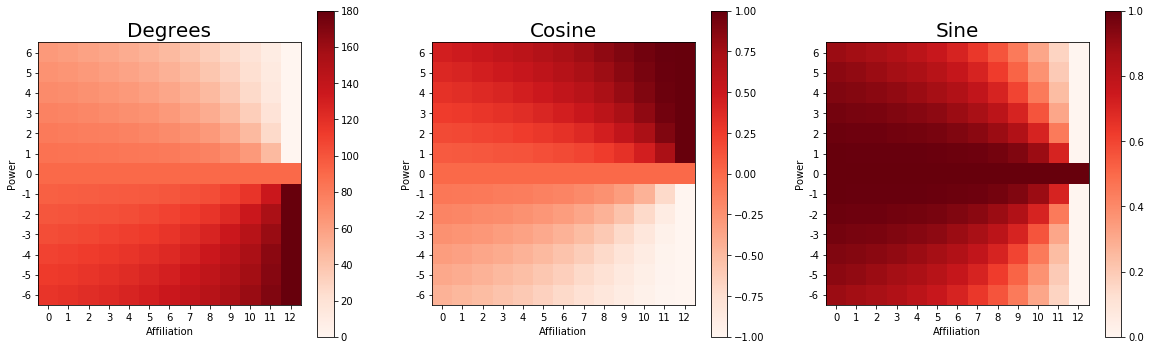

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

for a, (title, ang) in enumerate({'Degrees': degs, 'Cosine': cos, 'Sine': sin}.items()): 
    img = axs[a].imshow(ang, cmap='Reds', zorder=0)
    axs[a].set_title(title, fontsize=20)
    axs[a].set_xlabel('Affiliation', fontsize=10)
    axs[a].set_ylabel('Power', fontsize=10)
    
    axs[a].set_yticks(np.arange(0, 13, 1))
    axs[a].set_yticklabels(reversed(np.arange(-6,7)))
    axs[a].set_xticks(np.arange(0, 13, 1))
    axs[a].set_xticklabels(np.arange(0,13))
    plt.colorbar(img, ax=axs[a])
plt.show()

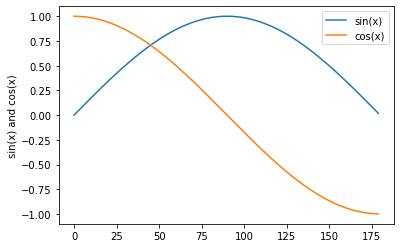

In [25]:
# x-axis: degrees
# y-axis: sine/cosine of degree
sin, cos = [], []
for x in np.arange(0,180):
    cos.append(np.cos(np.deg2rad(x)))
    sin.append(np.sin(np.deg2rad(x)))

x = np.arange(0,180)
plt.plot(x,sin,x,cos)
plt.ylabel('sin(x) and cos(x)')
plt.legend(['sin(x)', 'cos(x)'])
plt.show()

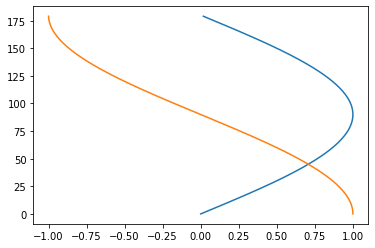

In [31]:
x = np.arange(0,180)
plt.plot(sin[::-1],x[::-1],cos[::-1],x[::-1])
# plt.ylabel('sin(x) and cos(x)')
# plt.legend(['sin(x)', 'cos(x)'])
plt.show()